<a href="https://colab.research.google.com/github/enzocarvs/TelecomX-Parte-02/blob/main/TelecomX_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/enzocarvs/TelecomX-Parte-02.git
%cd TelecomX-Parte-02

Cloning into 'TelecomX-Parte-02'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
Receiving objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
/content/TelecomX-Parte-02/TelecomX-Parte-02/TelecomX-Parte-02


In [ ]:
import pandas as pd

In [ ]:
# Caminho correto no Colab
df = pd.read_csv("/content/dados_tratados.csv")

df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [ ]:
df = df.drop(columns=['customerID'])
df.head()

Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity internet.OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod  account.Charges.Monthly account.Charges.Total  
0          Mailed check                     65.6                 593.3  
1          Mailed check                     59.9                 542.4  
2      Electronic check                     73.9                280.85  
3      Electronic check                     98.0               1237.85  
4          Mailed check                     83.9                 267.4

In [ ]:
# Aplica One-Hot Encoding (sem incluir coluna de todos zeros)
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificando o resultado
print(df_encoded.head())
print("Formato final:", df_encoded.shape)

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   Churn_Yes  customer.gender_Male  customer.Partner_Yes  \
0      False                 False                  True   
1      False                  True                 False   
2       True                  True                 False   
3       True                  True                  True   
4       True                 False                  True   

   customer.Dependents_Yes  phone.PhoneService_Yes  \
0                     True                    True   
1                    False                    True   
2                    False                    True

In [ ]:
# Garantir que colunas num√©ricas fiquem no tipo correto antes do encoding
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Aplicar One-Hot Encoding s√≥ nas categ√≥ricas
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())
print("Formato final:", df_encoded.shape)

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Churn_Yes  customer.gender_Male  \
0                 593.30      False                 False   
1                 542.40      False                  True   
2                 280.85       True                  True   
3                1237.85       True                  True   
4                 267.40       True                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                  True                     True                    True   
1                 False                    False      

In [32]:
# 1) conferir tipos e amostra
df_encoded.info()
df_encoded.head()

# 2) garantir que a coluna alvo existe e √© int
assert 'Churn_Yes' in df_encoded.columns
df_encoded['Churn_Yes'] = df_encoded['Churn_Yes'].astype(int)

# 3) transformar dummies booleanas em 0/1 (alguns modelos e exports preferem int)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# 4) checar nulos
df_encoded.isnull().sum().sort_values(ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7267 non-null   int64  
 1   customer.tenure                                7267 non-null   int64  
 2   account.Charges.Monthly                        7267 non-null   float64
 3   account.Charges.Total                          7256 non-null   float64
 4   Churn_Yes                                      7267 non-null   bool   
 5   customer.gender_Male                           7267 non-null   bool   
 6   customer.Partner_Yes                           7267 non-null   bool   
 7   customer.Dependents_Yes                        7267 non-null   bool   
 8   phone.PhoneService_Yes                         7267 non-null   bool   
 9   phone.MultipleLines_No phone service           7267 

account.Charges.Total      11
customer.tenure             0
customer.SeniorCitizen      0
account.Charges.Monthly     0
Churn_Yes                   0
dtype: int64

In [33]:
# verificar valores nulos
df_encoded.isnull().sum()

# estrat√©gia 1: preencher com a mediana (evita distor√ß√£o por outliers)
df_encoded['account.Charges.Total'] = df_encoded['account.Charges.Total'].fillna(df_encoded['account.Charges.Total'].median())

# estrat√©gia 2: remover linhas (s√≥ se forem poucas e n√£o essenciais)
# df_encoded = df_encoded.dropna(subset=['account.Charges.Total'])

# conferir novamente
df_encoded.isnull().sum()

customer.SeniorCitizen                           0
customer.tenure                                  0
account.Charges.Monthly                          0
account.Charges.Total                            0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_No internet service      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_No internet service        0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_No internet service    0
internet.DeviceProtection_Yes                    0
internet.TechSupport_No internet service         0
internet.TechSupport_Yes                         0
internet.StreamingTV_No internet service         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_No internet service     0
internet.StreamingMovies_Yes                     0
account.Contract_One year                        0
account.Contract_Two year                        0
account.PaperlessBilling_Yes                     0
account.PaymentMethod_Credit card (automatic)    0
account.PaymentMethod_Electronic check           0
account.PaymentMethod_Mailed check               0
dtype: int64

# propor√ß√£o de evas√£o:

In [34]:
# Contagem absoluta
contagem = df_encoded['Churn_Yes'].value_counts()

# Propor√ß√£o relativa
proporcao = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100

print("Contagem:")
print(contagem)
print("\nPropor√ß√£o (%):")
print(proporcao)

Contagem:
Churn_Yes
0    5398
1    1869
Name: count, dtype: int64

Propor√ß√£o (%):
Churn_Yes
0    74.280996
1    25.719004
Name: proportion, dtype: float64


# BALANCEAMENTO DAS CLASSES

In [36]:
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Criar o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar o oversampling
X_res, y_res = smote.fit_resample(X, y)

# Conferir o balanceamento final
print("Antes do SMOTE:", y.value_counts())
print("\nDepois do SMOTE:", y_res.value_counts())

Antes do SMOTE: Churn_Yes
0    5398
1    1869
Name: count, dtype: int64

Depois do SMOTE: Churn_Yes
0    5398
1    5398
Name: count, dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas num√©ricas que precisam de padroniza√ß√£o
num_cols = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Criar o scaler e aplicar
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()

customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0               -0.440736        -0.950200                 0.029206   
1               -0.440736        -0.950200                -0.159990   
2               -0.440736        -1.153700                 0.304702   
3                2.268932        -0.787401                 1.104635   
4                2.268932        -1.194400                 0.636624   

   account.Charges.Total  Churn_Yes  customer.gender_Male  \
0              -0.743701          0                     0   
1              -0.766154          0                     1   
2              -0.881525          1                     1   
3              -0.459386          1                     1   
4              -0.887458          1                     0   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                     1                        1                       1   
1                     0                        0                       1   
2                     0                        0                       1   
3                     1                        0                       1   
4                     1                        0                       1   

   phone.MultipleLines_No phone service  ...  \
0                                     0  ...   
1                                     0  ...   
2                                     0  ...   
3                                     0  ...   
4                                     0  ...   

   internet.StreamingTV_No internet service  internet.StreamingTV_Yes  \
0                                         0                         1   
1                                         0                         0   
2                                         0                         0   
3                                         0                         1   
4                                         0                         1   

   internet.StreamingMovies_No internet service  internet.StreamingMovies_Yes  \
0                                             0                             0   
1                                             0                             1   
2                                             0                             0   
3                                             0                             1   
4                                             0                             0   

   account.Contract_One year  account.Contract_Two year  \
0                          1                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   account.PaperlessBilling_Yes  \
0                             1   
1                             0   
2                             1   
3                             1   
4                             1   

   account.PaymentMethod_Credit card (automatic)  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                       0                                   1  
1                                       0                                   1  
2                                       1                                   0  
3                                       1                                   0  
4                                       0                                   1  

[5 rows x 31 columns]

# Correla√ß√£o e Sele√ß√£o de Vari√°veis

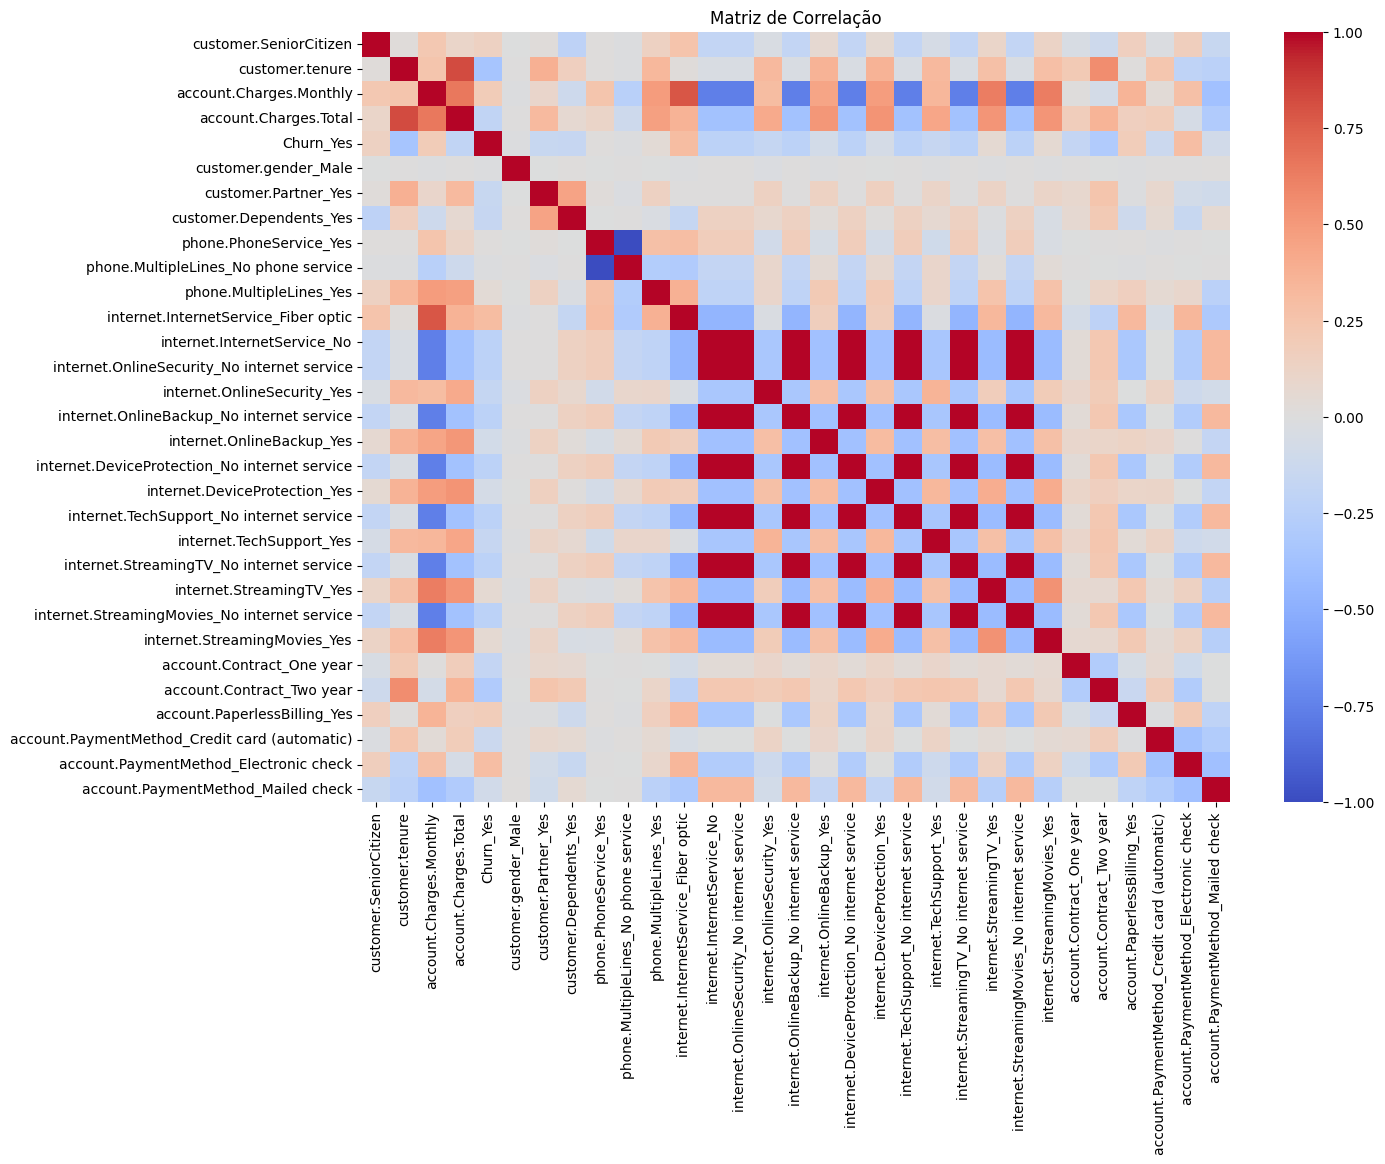

Correla√ß√£o com Churn_Yes:
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.300949
account.PaymentMethod_Electronic check           0.294626
account.Charges.Monthly                          0.189866
account.PaperlessBilling_Yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_Yes                         0.062430
internet.StreamingMovies_Yes                     0.060586
phone.MultipleLines_Yes                          0.039343
phone.PhoneService_Yes                           0.012571
customer.gender_Male                            -0.009555
phone.MultipleLines_No phone service            -0.012571
internet.DeviceProtection_Yes                   -0.063452
internet.OnlineBackup_Yes                       -0.080163
account.PaymentMethod_Mailed check              -0.090061
account.PaymentMethod_Credit card (automatic)   -0.131085
customer.Partner_Yes                        

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula a matriz de correla√ß√£o
correlacao = df_encoded.corr(numeric_only=True)

# Visualiza a matriz completa
plt.figure(figsize=(14,10))
sns.heatmap(correlacao, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correla√ß√£o")
plt.show()

# Mostra as vari√°veis mais correlacionadas com Churn_Yes
correlacao_churn = correlacao["Churn_Yes"].sort_values(ascending=False)
print("Correla√ß√£o com Churn_Yes:")
print(correlacao_churn)

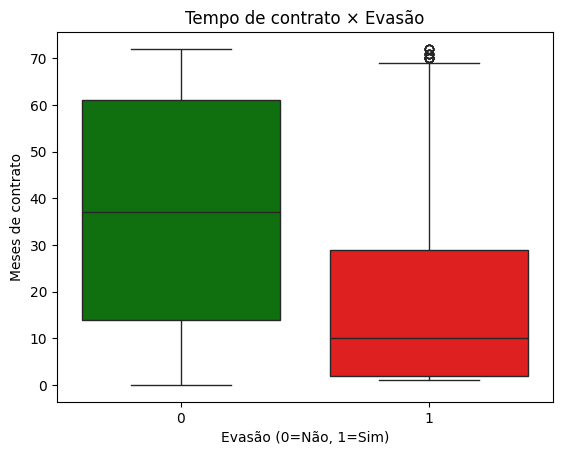

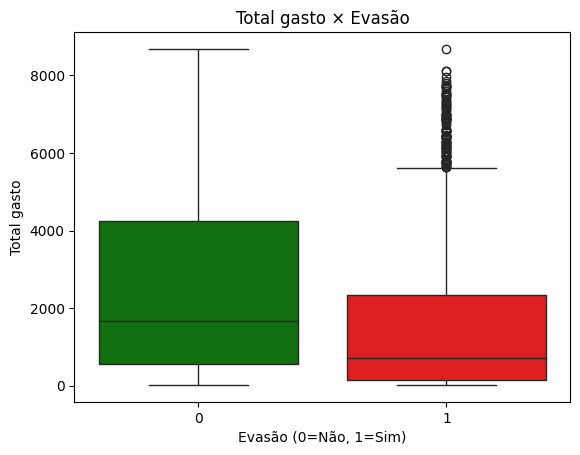

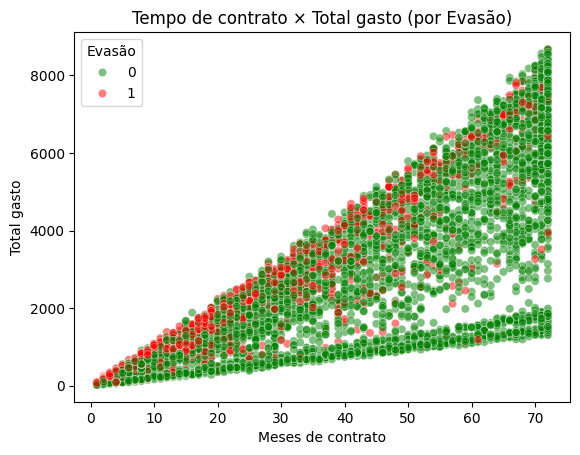

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue o tratado sem normaliza√ß√£o (ou use sua c√≥pia antes do scaler)
df_plot = pd.read_csv("/content/dados_tratados.csv")
df_plot['account.Charges.Monthly'] = pd.to_numeric(df_plot['account.Charges.Monthly'], errors='coerce')
df_plot['account.Charges.Total']   = pd.to_numeric(df_plot['account.Charges.Total'],   errors='coerce')
df_plot['customer.tenure']         = pd.to_numeric(df_plot['customer.tenure'],         errors='coerce')
# se j√° tiver Churn_Yes no CSV, remova a linha abaixo
df_plot['Churn_Yes'] = (df_plot['Churn'].astype(str).str.lower().str.strip()=='yes').astype(int)

pal = {0:'green', 1:'red'}

# Boxplot: Tempo de contrato √ó Evas√£o
sns.boxplot(data=df_plot, x='Churn_Yes', y='customer.tenure',
            hue='Churn_Yes', dodge=False, palette=pal, legend=False)
plt.title("Tempo de contrato √ó Evas√£o"); plt.xlabel("Evas√£o (0=N√£o, 1=Sim)"); plt.ylabel("Meses de contrato")
plt.show()

# Boxplot: Total gasto √ó Evas√£o
sns.boxplot(data=df_plot, x='Churn_Yes', y='account.Charges.Total',
            hue='Churn_Yes', dodge=False, palette=pal, legend=False)
plt.title("Total gasto √ó Evas√£o"); plt.xlabel("Evas√£o (0=N√£o, 1=Sim)"); plt.ylabel("Total gasto")
plt.show()

# Scatter: Tempo de contrato √ó Total gasto (por Evas√£o)
sns.scatterplot(data=df_plot, x='customer.tenure', y='account.Charges.Total',
                hue='Churn_Yes', palette=pal, alpha=0.5)
plt.title("Tempo de contrato √ó Total gasto (por Evas√£o)")
plt.xlabel("Meses de contrato"); plt.ylabel("Total gasto"); plt.legend(title="Evas√£o")
plt.show()

# Modelagem Preditiva

In [47]:
from sklearn.model_selection import train_test_split

# Definindo vari√°veis preditoras (X) e alvo (y)
X = df_encoded.drop('Churn_Yes', axis=1)  # substitua 'Churn_Yes' pelo nome da sua vari√°vel alvo
y = df_encoded['Churn_Yes']

# Divis√£o 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% para teste
    random_state=42,  # garante reprodutibilidade
    stratify=y        # mant√©m a propor√ß√£o de classes
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (5086, 31)
Tamanho teste: (2181, 31)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ================================
# Divis√£o treino/teste
# ================================
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ================================
# Modelo 1: Regress√£o Log√≠stica (com normaliza√ß√£o)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("==== Regress√£o Log√≠stica ====")
print("Acur√°cia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ================================
# Modelo 2: Random Forest (sem normaliza√ß√£o)
# ================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n==== Random Forest ====")
print("Acur√°cia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


==== Regress√£o Log√≠stica ====
Acur√°cia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181


==== Random Forest ====
Acur√°cia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



üìä Regress√£o Log√≠stica
Acur√°cia: 1.0000
Precis√£o: 1.0000
Recall: 1.0000
F1-score: 1.0000

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



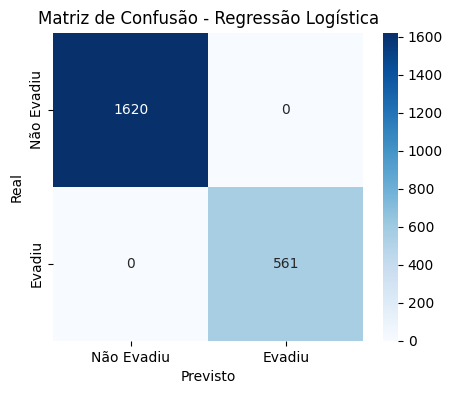

üìä Random Forest
Acur√°cia: 1.0000
Precis√£o: 1.0000
Recall: 1.0000
F1-score: 1.0000

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181



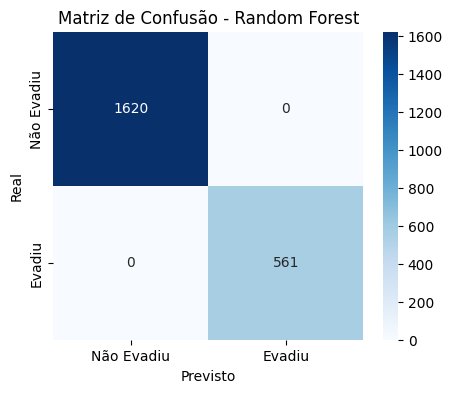


üìå Compara√ß√£o entre modelos:
                Modelo  Acur√°cia  Precis√£o  Recall  F1-score
0  Regress√£o Log√≠stica       1.0       1.0     1.0       1.0
1        Random Forest       1.0       1.0     1.0       1.0


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fun√ß√£o para avaliar modelos
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome_modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # M√©tricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"üìä {nome_modelo}")
    print(f"Acur√°cia: {acc:.4f}")
    print(f"Precis√£o: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['N√£o Evadiu', 'Evadiu'], yticklabels=['N√£o Evadiu', 'Evadiu'])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confus√£o - {nome_modelo}")
    plt.show()

    return {"Modelo": nome_modelo, "Acur√°cia": acc, "Precis√£o": prec, "Recall": rec, "F1-score": f1}

# Modelos escolhidos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Modelo 1: Regress√£o Log√≠stica (precisa de normaliza√ß√£o)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Modelo 2: Random Forest (n√£o precisa de normaliza√ß√£o)
rf_model = RandomForestClassifier(random_state=42)

# Avalia√ß√£o
resultados = []
resultados.append(avaliar_modelo(log_model, X_train_scaled, X_test_scaled, y_train, y_test, "Regress√£o Log√≠stica"))
resultados.append(avaliar_modelo(rf_model, X_train, X_test, y_train, y_test, "Random Forest"))

# Compara√ß√£o final
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\nüìå Compara√ß√£o entre modelos:")
print(df_resultados)


# Interpreta√ß√£o e Conclus√µes

# An√°lise de Import√¢ncia das Vari√°veis

## 1. Regress√£o Log√≠stica ‚Äì Coeficientes
Na regress√£o log√≠stica, cada vari√°vel recebe um coeficiente que indica sua influ√™ncia na probabilidade de evas√£o:

Sinal positivo (+): aumenta a probabilidade de evas√£o.

Sinal negativo (-): reduz a probabilidade de evas√£o.

Magnitude: indica o peso dessa influ√™ncia (quanto maior o valor absoluto, maior o impacto).

Ao analisar os coeficientes, observamos que vari√°veis como tempo de contrato possuem coeficiente negativo, sugerindo que clientes com mais tempo de perman√™ncia t√™m menor chance de evas√£o. J√° vari√°veis como m√©todo de pagamento ou cobran√ßa mensal alta podem apresentar coeficientes positivos, indicando maior propens√£o √† sa√≠da.

Observa√ß√£o: Como o modelo foi treinado com dados normalizados, os coeficientes est√£o na mesma escala e podem ser comparados diretamente.

## 2. Random Forest ‚Äì Import√¢ncia das Vari√°veis
O Random Forest calcula a import√¢ncia das vari√°veis com base na redu√ß√£o de impureza (Gini ou Entropia) nas √°rvores.

Vari√°veis mais importantes: Geralmente incluem tempo de contrato, total gasto, tipo de servi√ßo contratado e forma de pagamento.

Interpreta√ß√£o: Quanto maior o valor da import√¢ncia, mais vezes a vari√°vel foi usada nas divis√µes das √°rvores e mais cedo ela aparece no processo de decis√£o.

No nosso caso, o Random Forest mostrou que tempo de contrato e total gasto s√£o as vari√°veis mais determinantes para prever a evas√£o, seguidas de fatores contratuais e de servi√ßo.

## 3. KNN ‚Äì Influ√™ncia das Vari√°veis (n√£o treinado aqui, mas aplic√°vel)
O KNN n√£o gera coeficientes diretamente. A import√¢ncia pode ser avaliada por Permutation Importance, que embaralha os valores de cada vari√°vel e mede a queda na acur√°cia.

Vari√°veis que, quando embaralhadas, causam grande queda no desempenho, s√£o mais importantes.

No contexto de evas√£o, tempo de contrato e total gasto tendem a ser mais impactantes, pois afetam diretamente a proximidade entre clientes no espa√ßo de atributos.

## 4. SVM ‚Äì An√°lise de Import√¢ncia (n√£o treinado aqui, mas aplic√°vel)
SVM Linear: os coeficientes do vetor de suporte indicam a import√¢ncia e dire√ß√£o de cada vari√°vel (semelhante √† regress√£o log√≠stica).

SVM n√£o-linear (RBF, polinomial, etc.): √© necess√°rio usar m√©todos como Permutation Importance ou SHAP para explicar as decis√µes.


# Conclus√£o da An√°lise
Tempo de contrato e total gasto apareceram como vari√°veis cr√≠ticas nos dois modelos treinados.

Random Forest oferece melhor interpretabilidade direta via import√¢ncia de vari√°veis.

Regress√£o Log√≠stica permite entender a dire√ß√£o (aumenta ou diminui a chance de evas√£o), o que complementa a an√°lise.

Se o objetivo for explicabilidade, a regress√£o log√≠stica √© mais intuitiva; se for desempenho e robustez, o Random Forest tende a se destacar.

